In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
nox_day = pd.read_excel('./한국남동발전_대기오염물질배출농도(일평균).xls')
nox = pd.read_excel('./한국남동발전_대기오염물질배출농도.xls')
fuel = pd.read_excel('./연료소비실적(그룹화 전).xls')
concentration = pd.read_excel('./한국남동발전_발전소주변농도(일평균).xls')
weather = pd.read_excel('./한국남동발전_기상정보(일평균).xls')
weather_ys = pd.read_csv('./여수산단_방재기상관측(일별).csv')
weather_ys_23 = pd.read_csv('./여수산단_습도_기압(2023).xls')
weather_ys_24 = pd.read_csv('./여수산단_습도_기압(2024).xls')
weather_final = pd.read_csv('./기상정보.csv', encoding='cp949')
power = pd.read_csv('./한국남동발전_발전실적.csv')
power_day = pd.read_csv('./일별화력발전데이터.csv', encoding='cp949')

In [40]:
power.head()

,사업소,호기,일자,용량(MW),발전량(MWh),열효율(%),이용률(%),발전원
0,경상대태양광,1,202412,0.91,78.62,0.0,11.61,태양력
1,고흥만 수상태양광,1,202412,63.48,6026.18,0.0,12.76,태양력
2,광양항세방태양광,1,202412,3.10,204.02,0.0,8.85,태양력
3,구미태양광,1,202412,0.99,94.24,0.0,12.79,태양력
4,군위 화산풍력,1,202412,11.55,3323.39,0.0,38.67,NaN


In [15]:
nox_day.head()

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,20241231,NaN,6.76,NaN,15.38,52558.65,124.67
1,분당,2호기,20241231,NaN,3.86,NaN,20.90,82.73,16.32
2,분당,3호기,20241231,NaN,8.07,NaN,15.22,69124.62,123.12
3,분당,4호기,20241231,NaN,3.47,NaN,20.85,109.42,20.09
4,분당,5호기,20241231,NaN,8.09,NaN,15.66,82712.37,108.17


In [14]:
weather_final.head()

,사업소,호기,일자,기온,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2023-01-01,-3.96,46.07,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,-,2023-01-02,-7.45,63.39,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,-,2023-01-03,-7.28,56.97,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,-,2023-01-04,-5.12,68.63,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.50,NaN,NaN
4,분당,-,2023-01-05,-4.20,72.47,324.25,1.42,NaN,NaN,-4.20,72.47,324.25,1.42,NaN,NaN


In [12]:

power_day.head()

,발전구분,호기,일자,1시 발전량(MWh),2시 발전량(MWh),3시 발전량(MWh),4시 발전량(MWh),5시 발전량(MWh),6시 발전량(MWh),7시 발전량(MWh),...,22시 발전량(MWh),23시 발전량(MWh),24시 발전량(MWh),총량(KW),평균(KW),최대(시간별),최소(시간별),최대,최소,Unnamed: 33
0,분당화력,CG1,2023-02-01,80314,80296,80537,80909,81545,81529,81544,...,81614,81905,82385,1945000,81042,82385,80130,82385,80130,
1,분당화력,CG2,2023-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
2,분당화력,CG3,2023-02-01,83667,83300,83492,83719,84358,84467,84583,...,86852,84566,83640,2025000,84375,86852,83300,86852,83300,
3,분당화력,CG4,2023-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,분당화력,CG5,2023-02-01,80162,80498,80625,80241,80830,80986,80841,...,79525,81313,81935,1931000,80458,81935,78935,81935,78935,


In [16]:
weather_df = pd.read_csv('./기상정보.csv', encoding='euc-kr')
nox_day = pd.read_excel('./한국남동발전_대기오염물질배출농도(일평균).xls')
nox_df = pd.read_csv('./일별화력발전데이터.csv', encoding='euc-kr')

In [ ]:
# 날짜 컬럼을 datetime으로 변환
weather_df["일자"] = pd.to_datetime(weather_df["일자"])
nox_df["일자"] = pd.to_datetime(nox_df["일자"])

# 발전소 개별 분석을 위해 각 발전소별 하루 총발전량을 구함
hourly_columns = [col for col in nox_df.columns if "발전량" in col and "총량" not in col]
nox_df["총발전량_KWh"] = nox_df[hourly_columns].sum(axis=1)

# 발전소명 추출
nox_df["사업소"] = nox_df["발전구분"].str.replace("화력", "", regex=False)

# 발전소별 일자 단위 총발전량 계산 (호기 구분 없이 합산)
plant_daily_generation = (
    nox_df.groupby(["사업소", "일자"])["총발전량_KWh"]
    .sum()
    .reset_index()
    .rename(columns={"총발전량_KWh": "총발전량_KWh"})
)

# 기상정보와 발전량 데이터를 일자 기준으로 병합 (기상정보도 발전소 기준이므로)
merged_df = pd.merge(weather_df, plant_daily_generation, on=["사업소", "일자"], how="inner")

# 컬럼 확인
merged_df.columns


Index(['사업소', '호기', '일자', '기온', '습도', '풍향', '풍속', '강수량', '기압', '대기안정도', '증발량',
       '일조시간', '전일강수량', '60분강수량', '금일강수량', '총발전량_KWh'],
      dtype='object')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# '분당' 발전소 데이터 추출
bundang_df = merged_df[merged_df["사업소"] == "분당"].copy()

# 사용할 변수들
variables = ["기온", "습도", "풍속", "기압", "일조시간"]
target = "총발전량_KWh"

# 상관계수 계산
correlations = bundang_df[variables + [target]].corr()[[target]].drop(target)

# 피어슨 상관 유의성 검정
pearson_results = {
    var: pearsonr(bundang_df[var], bundang_df[target])
    for var in variables
}
pearson_table = pd.DataFrame(
    {
        "상관계수": {var: r[0] for var, r in pearson_results.items()},
        "p값": {var: r[1] for var, r in pearson_results.items()},
    }
)

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("분당 발전소: 기상 변수와 발전량 상관관계")
plt.tight_layout()
plt.show()

pearson_table.sort_values(by="p값")


ValueError: array must not contain infs or NaNs

In [20]:
from scipy.stats import pearsonr

variables = ["기온", "습도", "풍속", "기압", "일조시간"]
target = "총발전량_KWh"

for var in variables:
    r, p = pearsonr(bundang_df[var], bundang_df[target])
    print(f"{var} vs {target} → 상관계수: {r:.3f}, p-value: {p:.4f}")

기온 vs 총발전량_KWh → 상관계수: -0.763, p-value: 0.0000
습도 vs 총발전량_KWh → 상관계수: -0.345, p-value: 0.0000
풍속 vs 총발전량_KWh → 상관계수: -0.186, p-value: 0.0000


ValueError: array must not contain infs or NaNs

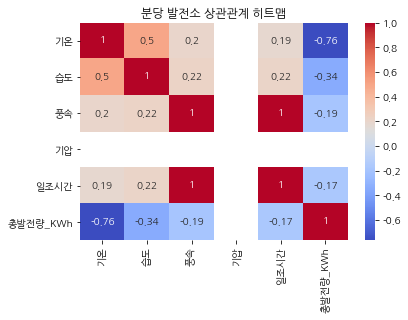

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(bundang_df[variables + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("분당 발전소 상관관계 히트맵")
plt.show()


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# 예: 분당 발전소 데이터에서 사용할 변수
features = ["기온", "습도", "풍속", "기압", "일조시간"]
target = "총발전량_KWh"

# 결측치 처리 + 표준화 파이프라인
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

X = bundang_df[features]  # 분당 발전소 데이터라고 가정
y = bundang_df[target]

X_processed = pipeline.fit_transform(X)

# 랜덤포레스트 회귀 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_processed, y)

print(f"features 길이: {len(features)}")
print(f"rf.feature_importances_ 길이: {len(rf.feature_importances_)}")

# 중요도 길이에 맞춰 features 자르기
features_corrected = features[:len(rf.feature_importances_)]

# 변수 중요도 출력
importance_df = pd.DataFrame({
    "변수": features_corrected,
    "중요도": rf.feature_importances_
}).sort_values(by="중요도", ascending=False)

print(importance_df)


features 길이: 5
rf.feature_importances_ 길이: 4
   변수       중요도
0  기온  0.823484
2  풍속  0.061279
1  습도  0.058354
3  기압  0.056882


In [23]:
print("features 길이:", len(features))
print("중요도 길이:", len(rf.feature_importances_))


features 길이: 5
중요도 길이: 4


In [30]:
nox_day.head()

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,20241231,NaN,6.76,NaN,15.38,52558.65,124.67
1,분당,2호기,20241231,NaN,3.86,NaN,20.90,82.73,16.32
2,분당,3호기,20241231,NaN,8.07,NaN,15.22,69124.62,123.12
3,분당,4호기,20241231,NaN,3.47,NaN,20.85,109.42,20.09
4,분당,5호기,20241231,NaN,8.09,NaN,15.66,82712.37,108.17


In [36]:
nox_day

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,20241231,NaN,6.76,NaN,15.38,52558.65,124.67
1,분당,2호기,20241231,NaN,3.86,NaN,20.90,82.73,16.32
2,분당,3호기,20241231,NaN,8.07,NaN,15.22,69124.62,123.12
3,분당,4호기,20241231,NaN,3.47,NaN,20.85,109.42,20.09
4,분당,5호기,20241231,NaN,8.09,NaN,15.66,82712.37,108.17
...,...,...,...,...,...,...,...,...,...
18897,영흥,4호기,20230101,21.53,97.49,137.92,20.90,7.18,1.25
18898,영흥,5호기,20230101,5.82,9.64,2.64,5.86,205956.66,93.10
18899,영흥,6호기,20230101,10.00,9.90,1.92,4.73,203659.54,91.33
18900,여수,-,20230101,0.00,11.79,19.91,16.55,17405.50,55.82


In [ ]:
nox_day

In [33]:
nox_day.groupby(['사업소', '호기']).count()

일자  SOX  NOX   먼지   산소   유량   온도
사업소 호기                                     
분당  1호기   728    0  728    0  728  728  728
    2호기   728    0  728    0  728  728  728
    3호기   727    0  727    0  727  727  727
    4호기   728    0  728    0  728  728  728
    5호기   726    0  726    0  726  726  726
    6호기   728    0  728    0  728  728  728
    7호기   728    0  728    0  728  728  728
    8호기   728    0  728    0  728  728  728
삼천포 3A호기  731  731  731  731  731  731  731
    3B호기  731  731  731  731  731  731  731
    4A호기  731  731  731  731  731  731  731
    4B호기  731  731  731  731  731  731  731
    5A호기  717  717  717  717  717  717  717
    5B호기  717  717  717  717  717  717  717
    6A호기  704  704  704  704  704  704  704
    6B호기  717  717  717  717  717  717  717
여수  -     731  731  731  731  731  731  731
    1호기   731  731  731  731  731  731  731
영동  1호기   730  730  730  730  730  730  730
    2호기   730  730  730  730  730  730  730
영흥  1호기   730  730  730  730  730  730  730
    2호기   730  730  730  730  730  730  730
    3호기   730  730  730  730  730  730  730
    4호기   730  730  730  730  730  729  730
    5호기   730  730  730  730  730  730  730
    6호기   730  730  730  730  730  730  730

In [34]:
power.groupby(['사업소', '호기']).count()

일자  용량(MW)  발전량(MWh)  열효율(%)  이용률(%)  발전원
사업소       호기                                           
경상대태양광    1   24      24        24      24      24   24
고흥만 수상태양광 1   16      16        16      16      16   16
광양항세방태양광  1   24      24        24      24      24   24
구미태양광     1   24      24        24      24      24   24
군위 화산풍력   1   24      24        24      24      24    0
...           ..     ...       ...     ...     ...  ...
영흥해양소수력   2   24      24        24      24      24   24
          3   24      24        24      24      24   24
예천태양광     1   24      24        24      24      24   24
탑선태양광     1   24      24        24      24      24   24
          3   24      24        24      24      24   24

[64 rows x 6 columns]

In [37]:
power_day.head()

,발전구분,호기,일자,1시 발전량(MWh),2시 발전량(MWh),3시 발전량(MWh),4시 발전량(MWh),5시 발전량(MWh),6시 발전량(MWh),7시 발전량(MWh),...,22시 발전량(MWh),23시 발전량(MWh),24시 발전량(MWh),총량(KW),평균(KW),최대(시간별),최소(시간별),최대,최소,Unnamed: 33
0,분당화력,CG1,2023-02-01,80314,80296,80537,80909,81545,81529,81544,...,81614,81905,82385,1945000,81042,82385,80130,82385,80130,
1,분당화력,CG2,2023-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
2,분당화력,CG3,2023-02-01,83667,83300,83492,83719,84358,84467,84583,...,86852,84566,83640,2025000,84375,86852,83300,86852,83300,
3,분당화력,CG4,2023-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,분당화력,CG5,2023-02-01,80162,80498,80625,80241,80830,80986,80841,...,79525,81313,81935,1931000,80458,81935,78935,81935,78935,


In [38]:
fuel.head()

,사업소,호기,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
0,분당연료전지,소계,2024-12,0,0,0,0,4218,0,0
1,분당화력,소계,2024-12,0,0,0,0,70370,0,0
2,삼천포,소계,2024-12,407691,0,407691,1606,0,1996,0
3,여수,소계,2024-12,161071,0,161071,1313,0,0,0
4,여수연료전지,소계,2024-12,0,0,0,0,1221,0,0


### api

In [8]:
import requests
import pprint
import json

In [9]:
url = 'http://api.data.go.kr/openapi/tn_pubr_public_ovrspd_prvn_manage_api?serviceKey=oYZGRmIP3dl1mPvQ5Ztk5l13K9cSA/lfUhCXNdthnQBVaVndtKDggm2WwnNrFxVFXxTe6rqXIxHeZspDaBAeUg==&pageNo=1&numOfRows=100&type=json'

In [10]:
response = requests.get(url)
contents = response.text

In [11]:
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

('{"response":{"header":{"resultCode": "30","resultMsg":"SERVICE KEY IS NOT '
 'REGISTERED ERROR."}}}')
None


In [7]:
import pandas as pd
from pandas.io.json import json_normalize

json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob))
body = json_ob['response']['body']['items']

dataframe = json_normalize(body)
print(dataframe)

{'response': {'header': {'resultCode': '30', 'resultMsg': 'SERVICE KEY IS NOT REGISTERED ERROR.'}}}
<class 'dict'>


KeyError: 'body'